# Explore the distribution of all organ-specific TLand scores over common SNPs

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tland_score_file = Path('ukbb_data/all_tland_scores.tsv.gz')
tland_scores = pd.read_table(tland_score_file)

In [3]:
tland_scores

,chrom,pos,ref,alt,vasculature_TLand_lightest,blood_TLand,placenta_TLand_lightest,lymph node_TLand_lightest,blood vessel_TLand_lightest,ear_TLand_lightest,...,pancreas_TLand_lightest,eye_TLand_lightest,lung_TLand,extraembryonic component_TLand_lightest,intestine_TLand_lightest,small intestine_TLand_lightest,spinal cord_TLand_lightest,epithelium_TLand,thymus_TLand_lightest,rsid
0,chr1,226392686,T,G,0.255478,0.122144,0.455339,0.334866,0.217459,0.249635,...,0.246119,0.274414,0.133977,0.455150,0.221294,0.188509,0.274168,0.219472,0.431008,rs1000033
1,chr1,162766673,C,T,0.143171,0.123992,0.147473,0.135414,0.140319,0.131856,...,0.147843,0.126743,0.120609,0.148504,0.125814,0.123043,0.129437,0.129412,0.127294,rs1000050
2,chr1,222186270,C,T,0.140933,0.126371,0.148505,0.138113,0.145581,0.144672,...,0.144800,0.145921,0.116912,0.133564,0.136692,0.127871,0.139349,0.117134,0.121131,rs1000070
3,chr1,157285606,A,G,0.305256,0.141275,0.187588,0.223652,0.305285,0.170012,...,0.205634,0.364031,0.155990,0.190923,0.157984,0.196628,0.184967,0.161080,0.193666,rs1000073
4,chr1,94701276,C,T,0.258819,0.142790,0.218942,0.291774,0.220429,0.196977,...,0.218402,0.172357,0.129538,0.172462,0.257248,0.216482,0.188255,0.138973,0.182220,rs1000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23344870,chr22,19220335,C,T,0.141426,0.490679,0.153764,0.146991,0.150953,0.160877,...,0.149849,0.137804,0.116579,0.152814,0.150868,0.186342,0.185128,0.116300,0.185800,rs999699
23344871,chr22,20441888,T,C,0.383695,0.805380,0.724655,0.284810,0.381358,0.257791,...,0.200924,0.145291,0.131404,0.576708,0.222569,0.149303,0.189667,0.732534,0.335146,rs9997
23344872,chr22,33868850,T,A,0.144527,0.129180,0.177855,0.170409,0.142806,0.187002,...,0.218319,0.157099,0.118194,0.194563,0.143102,0.189074,0.171455,0.167256,0.221910,rs999719
23344873,chr22,44277755,G,A,0.114492,0.115294,0.116686,0.121542,0.114873,0.115759,...,0.115021,0.116261,0.115652,0.118011,0.115021,0.116016,0.145106,0.115679,0.117565,rs999829


In [4]:
tland_cols = [col for col in tland_scores.columns if 'TLand' in col]
organ_score_quantiles = {}
for organ in tland_cols:
    score_quantiles = np.quantile(tland_scores[organ], [0.5, 0.75, 0.9, 0.95, 0.99])
    organ_score_quantiles[organ] = score_quantiles
organ_score_quantiles_df = pd.DataFrame(organ_score_quantiles, index=['50%', '75%', '90%', '95%', '99%']).T

In [5]:
organ_score_quantiles_df

,50%,75%,90%,95%,99%
vasculature_TLand_lightest,0.134471,0.193388,0.316972,0.451478,0.668753
blood_TLand,0.126759,0.145662,0.386151,0.608991,0.808827
placenta_TLand_lightest,0.138820,0.201952,0.344982,0.492193,0.712042
lymph node_TLand_lightest,0.139271,0.204261,0.350919,0.477762,0.679241
blood vessel_TLand_lightest,0.137247,0.201149,0.330037,0.458206,0.673344
ear_TLand_lightest,0.138926,0.208544,0.368907,0.486259,0.652160
arterial blood vessel_TLand_lightest,0.134816,0.183316,0.313286,0.448149,0.649023
penis_TLand_lightest,0.135997,0.191539,0.321816,0.469596,0.714823
heart_TLand_lightest,0.139707,0.215131,0.395688,0.508189,0.672647
stomach_TLand_lightest,0.140219,0.210704,0.391161,0.517958,0.684257


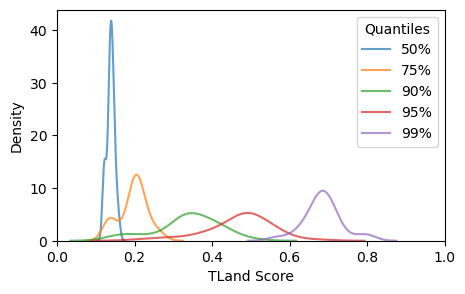

In [ ]:
plt.figure(figsize=(5, 3))
for pct in organ_score_quantiles_df.columns:
    sns.kdeplot(organ_score_quantiles_df[pct], fill=False, alpha=0.7, label=f'{pct}')

plt.xlabel('TLand Score')
plt.xlim(0, 1)
plt.legend(title='Quantiles')
plt.show()

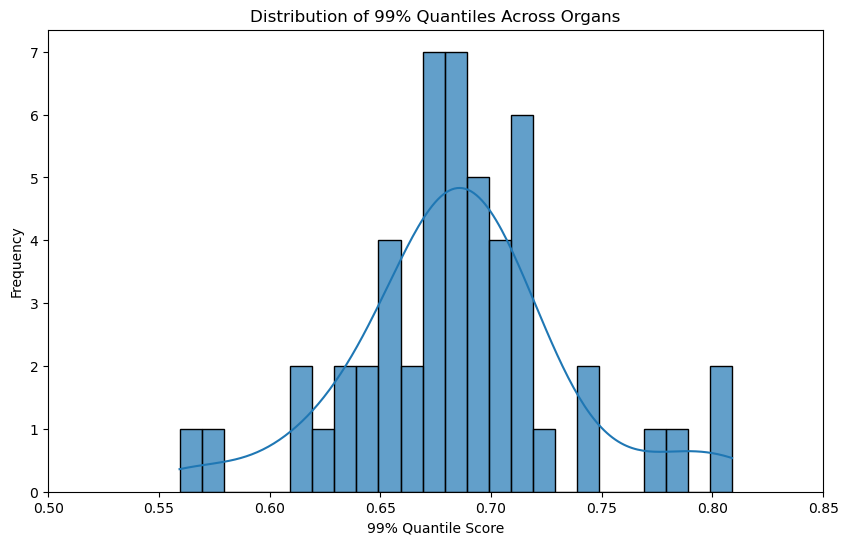

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(organ_score_quantiles_df['99%'], kde=True, alpha=0.7, bins=25)
plt.xlabel('99% Quantile Score')
plt.ylabel('Frequency')
plt.title('Distribution of 99% Quantiles Across Organs')
plt.xlim(0.5, 0.85)
plt.show()

In [31]:
for organ in tland_cols:
    high_score_count = (tland_scores[organ] >= 0.7).sum()
    total_count = len(tland_scores)
    percentage = (high_score_count / total_count) * 100
    print(f"{organ}: {percentage:.2f}% ({int(high_score_count)})")

vasculature_TLand_lightest: 0.66% (154204)
blood_TLand: 3.03% (708401)
placenta_TLand_lightest: 1.16% (271870)
lymph node_TLand_lightest: 0.74% (173865)
blood vessel_TLand_lightest: 0.70% (163139)
ear_TLand_lightest: 0.55% (128536)
arterial blood vessel_TLand_lightest: 0.48% (111499)
penis_TLand_lightest: 1.17% (273679)
heart_TLand_lightest: 0.70% (163225)
stomach_TLand_lightest: 0.76% (177951)
nerve_TLand_lightest: 1.41% (328165)
embryo_TLand_lightest: 1.51% (352574)
connective tissue_TLand: 1.08% (251779)
mammary gland_TLand: 0.79% (183307)
adipose tissue_TLand_lightest: 0.82% (190320)
immune organ_TLand_lightest: 0.72% (168307)
esophagus_TLand_lightest: 1.28% (298262)
limb_TLand_lightest: 0.25% (57495)
adrenal gland_TLand_lightest: 0.32% (75748)
testis_TLand_lightest: 0.61% (143267)
skin of prepuce of penis_TLand_lightest: 0.53% (124270)
large intestine_TLand_lightest: 0.73% (169399)
vagina_TLand_lightest: 1.36% (318403)
thyroid gland_TLand_lightest: 0.86% (201766)
gonad_TLand_light